# Zadatak 10. - Integracija

Proizvođač kuhinjskih proizvoda proizvodi različite plastične činije. Sve plastične činije se proizvode rotiranjem krive $y = ae^{bx}$ oko $y$-ose.  
Za datu činiju poznato je da kriva $y = ae^{bx}$ prolazi kroz tačke iz sledeće tabele:

| $x$  (cm) |  $y$  (cm) |
|--------------|--------------|
| 0.1          | 0.007        |
| 0.5          | 0.011        |
| 1.0          | 0.021        |
| 1.5          | 0.038        |
| 2.5          | 0.126        |
| 3.5          | 0.417        |
| 4.5          | 1.384        |
| 5.5          | 4.594        |
| 6.0          | 8.371        |

### Zadatak

1. Izračunati zapreminu plastične činije, ako znamo da je visina činije 10 cm.

2. Bez promene širine i visine činije, odrediti parametre $a$ i $b$ tako da činija ima zapreminu od tačno jedan litar.

3. Da li postoje $a, b \in \mathbb{R}$ tako da činija ima maksimalnu zapreminu ukoliko su joj širina i visina ograničeni?


---
## Rešenje:

Prvo na osnovu tabele moramo da odredimo nepoznate parametre funkcije $y = ae^{bx}$. <br>

In [1021]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
sym.init_printing() # lep ispis

# Podaci iz tabele
x_data = np.array([0.1, 0.5, 1.0, 1.5, 2.5, 3.5, 4.5, 5.5, 6.0])  # u cm
y_data = np.array([0.007, 0.011, 0.021, 0.038, 0.126, 0.417, 1.384, 4.594, 8.371])  # u cm


def func(x, a, b):
    return a * np.exp(b * x)

# curve_fit
params, _ = curve_fit(func, x_data, y_data)
a, b = params
print(f"a = {a}, b = {b}")


a = 0.00625307968312756, b = 1.1999069278760732


Dobijamo da je jednačina krive:

In [1023]:
x, y = sym.symbols('x y')
f = a * sym.exp(b * x)  
f

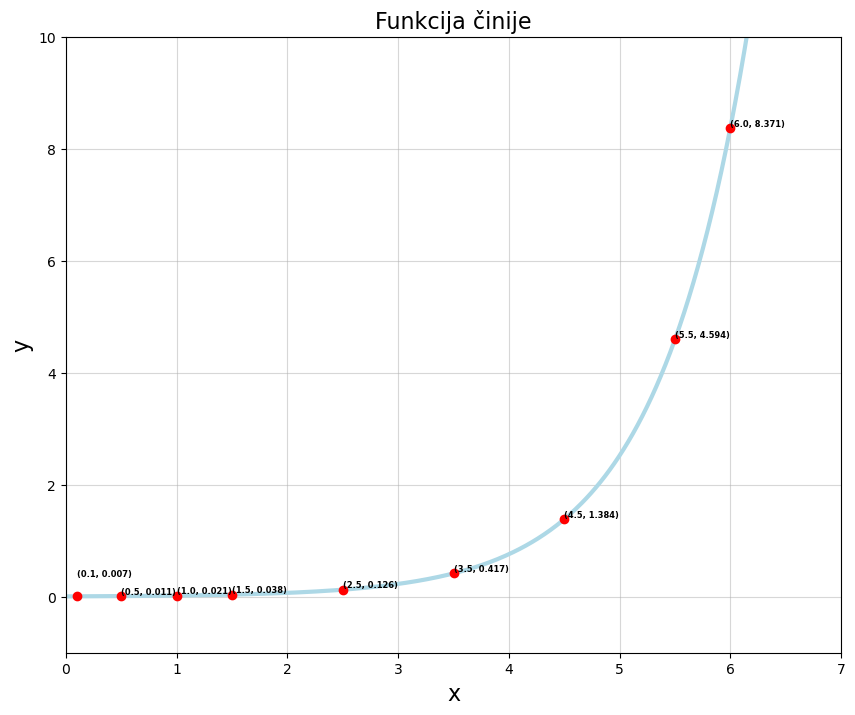

In [1024]:
x_vals = np.linspace(0, 7, 500)
f_lamb = lambda x: a*np.exp(b*x)
y_vals = f_lamb(x_vals)


plt.figure(figsize=(10, 8))
plt.plot(x_vals, y_vals, linewidth=3, color = "lightblue")
plt.plot(x_data, y_data, "ro")

i = 0
for x_, y_ in zip(x_data, y_data):
    if(i<1):
        offset = 3.2
    else:
        offset = 0
    plt.text(x_, f_lamb(x_ + offset), f'({x_}, {y_})', fontsize=6, fontweight = 'bold', ha='left', va='bottom') 
    i += 1
    
plt.title("Funkcija činije", fontsize=16)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(0, 7)
plt.ylim(-1, 10)
plt.grid(alpha = 0.5)

plt.show()

## 1. Izračunati zapreminu plastične činije, ako znamo da je visina činije 10 cm.

Koristićemo formulu za zapreminu obrtnog tela oko $x$ ose:
$$V = \pi \int _{c}^{d} g(x)^2 \,dx \tag{1}$$

Potrebna nam je invezna funkcija funkcije $f$.

In [1164]:
g = (sym.ln(x/a))/b
g

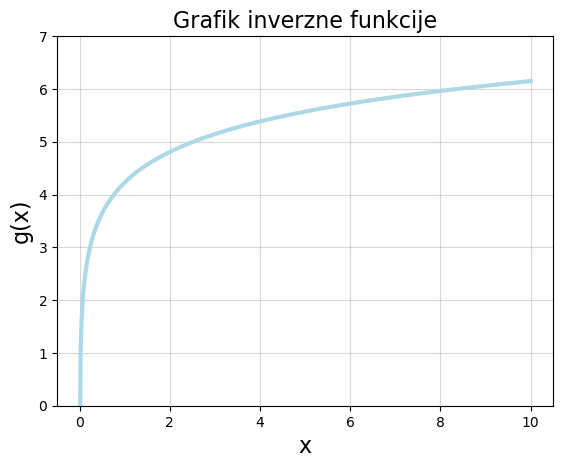

In [1166]:
x_vals = np.linspace(0.001, 10, 500)
f_lamb = sym.lambdify(x, g,'numpy')
y_vals = f_lamb(x_vals)


plt.plot(x_vals, y_vals, linewidth=3, color = "lightblue")

plt.title(r"Grafik inverzne funkcije", fontsize=16)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.ylim(0, 7)
plt.grid(alpha = 0.5)

plt.show()

Po formuli $(1)$:


$V = \pi \int _{a}^{a+10} {(g(x))^2}\,dx$

Granice integracije smo ovako postavili da bi visina bila 10, jer presek sa $y$ osom, funkcije $f$, zavisi od parametra $a$ odnosno: <br>
$y_0 = ae^{b0} = a$ što ukazuje da nam dno činije počinje od koordinate $y_0 = a$, pa da bi visina bila 10, moramo uraditi integral do $a+10$.<br>
Pošto radimo sa inverznom funkcijom, ono što je za $f$, $y_0$, to je za $g$, $x_0$.

In [1171]:
V = sym.pi * sym.integrate(g*g,(x,a,a+10))
V

In [1173]:
V.evalf()

---

## 2. Bez promene širine i visine činije, odrediti parametre $a$ i $b$ tako da činija ima zapreminu od tačno jedan litar.

Pošto su nam potrebna 2 nepoznata parametra, biće nam potrebne 2 jednačine sa 2 nepoznate. <br>
Jednačinu $(1)$ dobijamo iz uslova da se širina i visina činije ne menjaju, odnosno visina činije ostaje $h=10$ a širina je $w = y_m$.<br>
Koordinate visine i širine su $x_m = a_x + h = a_x + 10$ i $y_m = f^{-1}(a+h) = f^{-1}(a+10) = const.$
Ovde su $a_x$ i $b_x$ nepoznati parametri.

Ova jednačina nam govori da grafik funkcije mora da prolazi kroz tačku $(x_m, y_m)$ jer će se tako očuvati širina i visina.

In [1177]:
a_x, b_x = sym.symbols("a_x b_x") # definišemo nepoznate parametre
h = sym.Symbol("h")
x_m = h + a_x # koordinata za visinu zavisi od a_x
y_m = (sym.ln((h+a)/a))/b # koordinata za širinu mora biti ista da bi širina činije ostala ista
print("y_m=", y_m, "\nx_m=",x_m,)

y_m= 0.83339797176609*log(159.921198941101*h + 1.0) 
x_m= a_x + h


$$y_m = \frac {\ln (\frac {x_m}{a_x})}{b_x}\tag{1}$$
$$\pi \int _{a_x}^{a_x+h}{(  \frac {\ln (\frac {x}{a_x})}{b_x})^2} \, dx = 1000 \tag{2}$$


Jednačinu $(2)$ dobijamo iz uslova da zapremina mora da bude $1 L=1000 cm^3$.

In [1181]:
eq1_desno = (sym.ln((x_m)/a_x))/b_x
eq1 = sym.Eq(y_m, eq1_desno) # prva jednačina
eq1

In [1183]:
eq2_levo = sym.pi*sym.integrate(
                ((sym.ln(x/a_x))/b_x)**2, (x, a_x, a_x+h))
eq2 = sym.Eq(
    sym.simplify(eq2_levo),
    1000) # druga jednačina
eq2

Rešenje nalazimo <b>numeričkom</b> metodom: <br>
Uzećemo početnu pretpostavku, da su visina i širina kao u prošlom zadatku:

In [1186]:
visina = 10 # širina direktno zavisi od visine, pa je dovoljno samo uraditi substituciju visine

In [1188]:
# početna pretpostavka (guess za a_x i b_x)
guess = (1, 1)
a_1, b_1 = sym.nsolve((eq1.subs({h:visina}), eq2.subs({h:visina})), (a_x, b_x), guess)
#a_1, b_1 = sym.solve((eq1, eq2), (a_x, b_x))
print("a_x=", a_1, "\nb_x=", b_1)

a_x= 9.55924332789976e-5 
b_x= 1.87974278618790


<b>Provera:</b><br>
Sada ćemo da proverimo da li ova rešenja zadovoljavaju početne jednačine:

<b>Apsolutna greška za jednačinu $(1)$</b>

In [1192]:
abs(eq1_desno.subs({a_x:a_1, b_x:b_1, h:visina}) - y_m.subs({h:visina}))

<b>Apsolutna greška za jednačinu $(2)$</b>

In [1195]:
abs(eq2_levo.subs({a_x:a_1, b_x:b_1, h:visina}) - 1000)

In [1197]:
abs(eq2_levo.subs({a_x:a_1, b_x:b_1, h:visina}).evalf() - 1000)

---

## 3. Da li postoje $a, b \in \mathbb{R}$ tako da činija ima maksimalnu zapreminu ukoliko su joj širina i visina ograničeni?

Opet imamo sistem jednačina pod uslovom da $b_x \neq 0$:
$$y_m = \frac {\ln (\frac {x_m}{a_x})}{b_x}\tag{1}$$
$$\pi \int _{a_x}^{a_x+h}{(  \frac {\ln (\frac {x}{a_x})}{b_x})^2} \, dx = V_{max} \tag{2}$$
Koordinate visine i širine su $x_m = a_x + h = a_x + 10$ i $y_m = f^{-1}(a+h) = f^{-1}(a+10) = const.$
Ovde su $a_x$ i $b_x$ nepoznati parametri.$V_{max}$ nam je maksimalna zapremina koju bismo dobili.

### 3.1 Za $b_x \neq 0$

Prvo određujemo određeni integral:

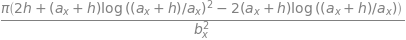

In [1058]:
a_x, b_x = sym.symbols("a_x b_x")
x_m = h + a_x # koordinata za visinu zavisi od a_x
y_m = (sym.ln((h+a)/a))/b # koordinata za širinu mora biti ista da bi širina činije ostala ista
y = sym.Symbol("y")
p = sym.simplify(
    sym.integrate(
        sym.pi*(sym.ln(x/a_x)/b_x)**2, (x,a_x,a_x+h)))

p

Iz $(1)$ ćemo izraziti $a_x(b_x)$ i zamenićemo u jednačinu $(2)$.

In [1060]:
r = sym.solve(sym.ln(x_m/a_x)/b_x- y_m, a_x)
r[0]

Usvojićemo početnu pretpostavku, da su visina i širina kao u prošlom zadatku:

In [1062]:
visina = 10 # širina direktno zavisi od visine, pa je dovoljno samo uraditi substituciju visine

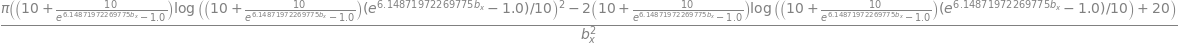

In [1224]:
q = p.subs({a_x:r[0], h:visina})
q

Potrebno je da vidimo da li ova funkcija ima <b>maksimum</b>.
Skiciraćemo je:

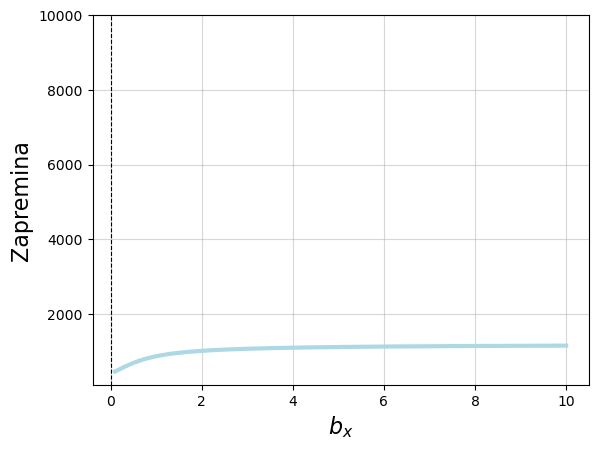

In [1229]:
#sym.plot(q)
x_vals = np.linspace(0.1, 10, 500)
q_plot_lamb = sym.lambdify(b_x, q,'numpy')
y_vals = q_plot_lamb(x_vals)


plt.plot(x_vals, y_vals, linewidth=3, color = "lightblue")

plt.title(r"", fontsize=16)
plt.axhline(0, color='black', linewidth=0.8, linestyle='-') 
plt.axvline(0, color='black', linewidth=0.8, linestyle='--') 
plt.xlabel(r"$b_x$", fontsize=16)
plt.ylabel('Zapremina', fontsize=16)
plt.ylim(100, 10000)
plt.grid(alpha = 0.5)

plt.show()

Vidimo da funkcija neprestano raste, odnosno, za veće $b_x$, dobijamo veću zapreminu.

Probaćemo da odredimo <b>ekstremume</b>:

In [1233]:
izvod = q.diff().simplify()
izvod

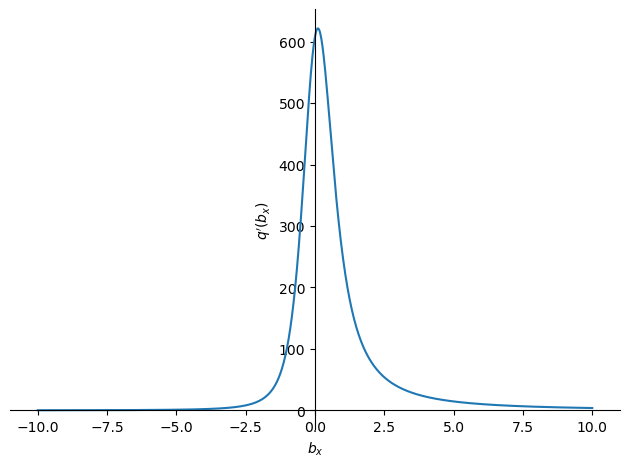

In [1235]:
sym.plot(izvod, ylabel=r"$q'(b_x)$")

Da bismo našli ekstremum nas zanima mesto gde ova funkcija seče $x$ osu. Očigledno da je ne seče nigde. <br>
Seče je u beskonačnosti:

In [1242]:
sym.limit(izvod, b_x, sym.oo)

In [1244]:
sym.limit(izvod, b_x, -sym.oo)

In [1246]:
guess = 10000
sym.nsolve(q.diff().expand(), guess)

In [1248]:
guess = 10000000000
sym.nsolve(q.diff().expand(), guess)

Za svako veće početno nagađanje, dobijamo sve veći "maksimum". 

Kada bismo pustili da $b_x\to \infty$, za $V_{max}$ se dobija:

In [1258]:
l = sym.limit(q, b_x, sym.oo).evalf()
l

$y = 1187.73421339678$ je horizontalna asimptota grafika $q(b_x)$:

In [1261]:
x_vals = np.linspace(0.1, 10, 500)
q_plot_lamb = sym.lambdify(b_x, q,'numpy')
y_vals = q_plot_lamb(x_vals)

asimpt_x = np.linspace(0, 10, 500)
asimpt_y = np.full_like(asimpt_x, l)  # Svi y su 10
plt.plot(asimpt_x, asimpt_y, linewidth=2, color = "red", linestyle='--', label=r"Asimptota $y = 1187.73421339678$")

plt.plot(x_vals, y_vals, linewidth=3, color = "lightblue", label=r"$V(b_x)$")
plt.plot(x_)
plt.title(r"", fontsize=16)
plt.axhline(0, color='black', linewidth=0.8, linestyle='-') 
plt.axvline(0, color='black', linewidth=0.8, linestyle='--') 
plt.xlabel(r"$b_x$", fontsize=16)
plt.ylabel('Zapremina', fontsize=16)
plt.ylim(100, 10000)
plt.grid(alpha = 0.5)
plt.legend()
plt.show()

### 3.2 Za $b_x = 0$:

$$y_m = a_xe^{0x_m} = a_x$$

Dobija se $a_x = y_m$, $b_x = 0$

Tada je funkcija činije $f(x) = y_m$

Recimo da je $y_m = 10$

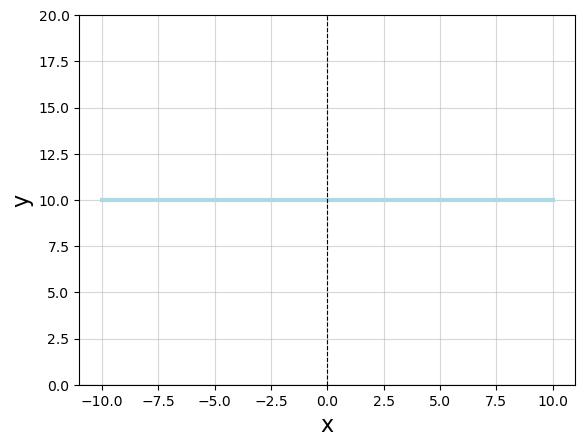

In [1083]:
x_vals = np.linspace(-10, 10, 500)
y_vals = np.full_like(x_vals, 10)  # Svi y su 10
plt.plot(x_vals, y_vals, linewidth=3, color = "lightblue")

plt.title(r"", fontsize=16)
plt.axhline(0, color='black', linewidth=0.8, linestyle='-') 
plt.axvline(0, color='black', linewidth=0.8, linestyle='--') 
plt.xlabel("x", fontsize=16)
plt.ylabel('y', fontsize=16)
plt.ylim(0, 20)
plt.grid(alpha = 0.5)

plt.show()

Rotiranjem ove funkcije oko $y$ ose se dobija površ a ne zapremina.

<b>Zaključak:</b>
Ne postoje $a, b \in \mathbb{R}$ tako da činija ima maksimalnu zapreminu ukoliko su joj širina i visina ograničeni.